<a href="https://colab.research.google.com/github/pranay-bisht/Computer-Vision-in-Flooded-Scenarios/blob/main/object_detection_in_post_flood_scenarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DETECTING OBJECTS OF INTEREST IN POST FLOOD SCENARIOS**

In [ ]:
!nvidia-smi

Thu Jun 29 10:12:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


**Installing YOLO v8**

In [ ]:
# Pip install method (recommended)
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
# Git clone method (for development)
# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .
# from IPython import display
# display.clear_output()
# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

[Errno 2] No such file or directory: '{HOME}'
/content
/bin/bash: yolo: command not found


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow --quiet
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="R0xNYlXELs52TMPVDMT3")
project = rf.workspace("pranay-bisht-jadts").project("object-detection-in-post-flood-scenarios-2")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Object-detection-in-post-flood-scenarios-2-1 in yolov8:: 100%|██████████| 1008/1008 [00:00<00:00, 2273.22it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Object-detection-in-post-flood-scenarios-2-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimi

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1687225298.37a7f4c2508c.1385.0  train_batch2.jpg
F1_curve.png					    train_batch390.jpg
model_artifacts.json				    train_batch391.jpg
P_curve.png					    train_batch392.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
roboflow_deploy.zip				    weights
state_dict.pt


CONFUSION MATRIX:

/content


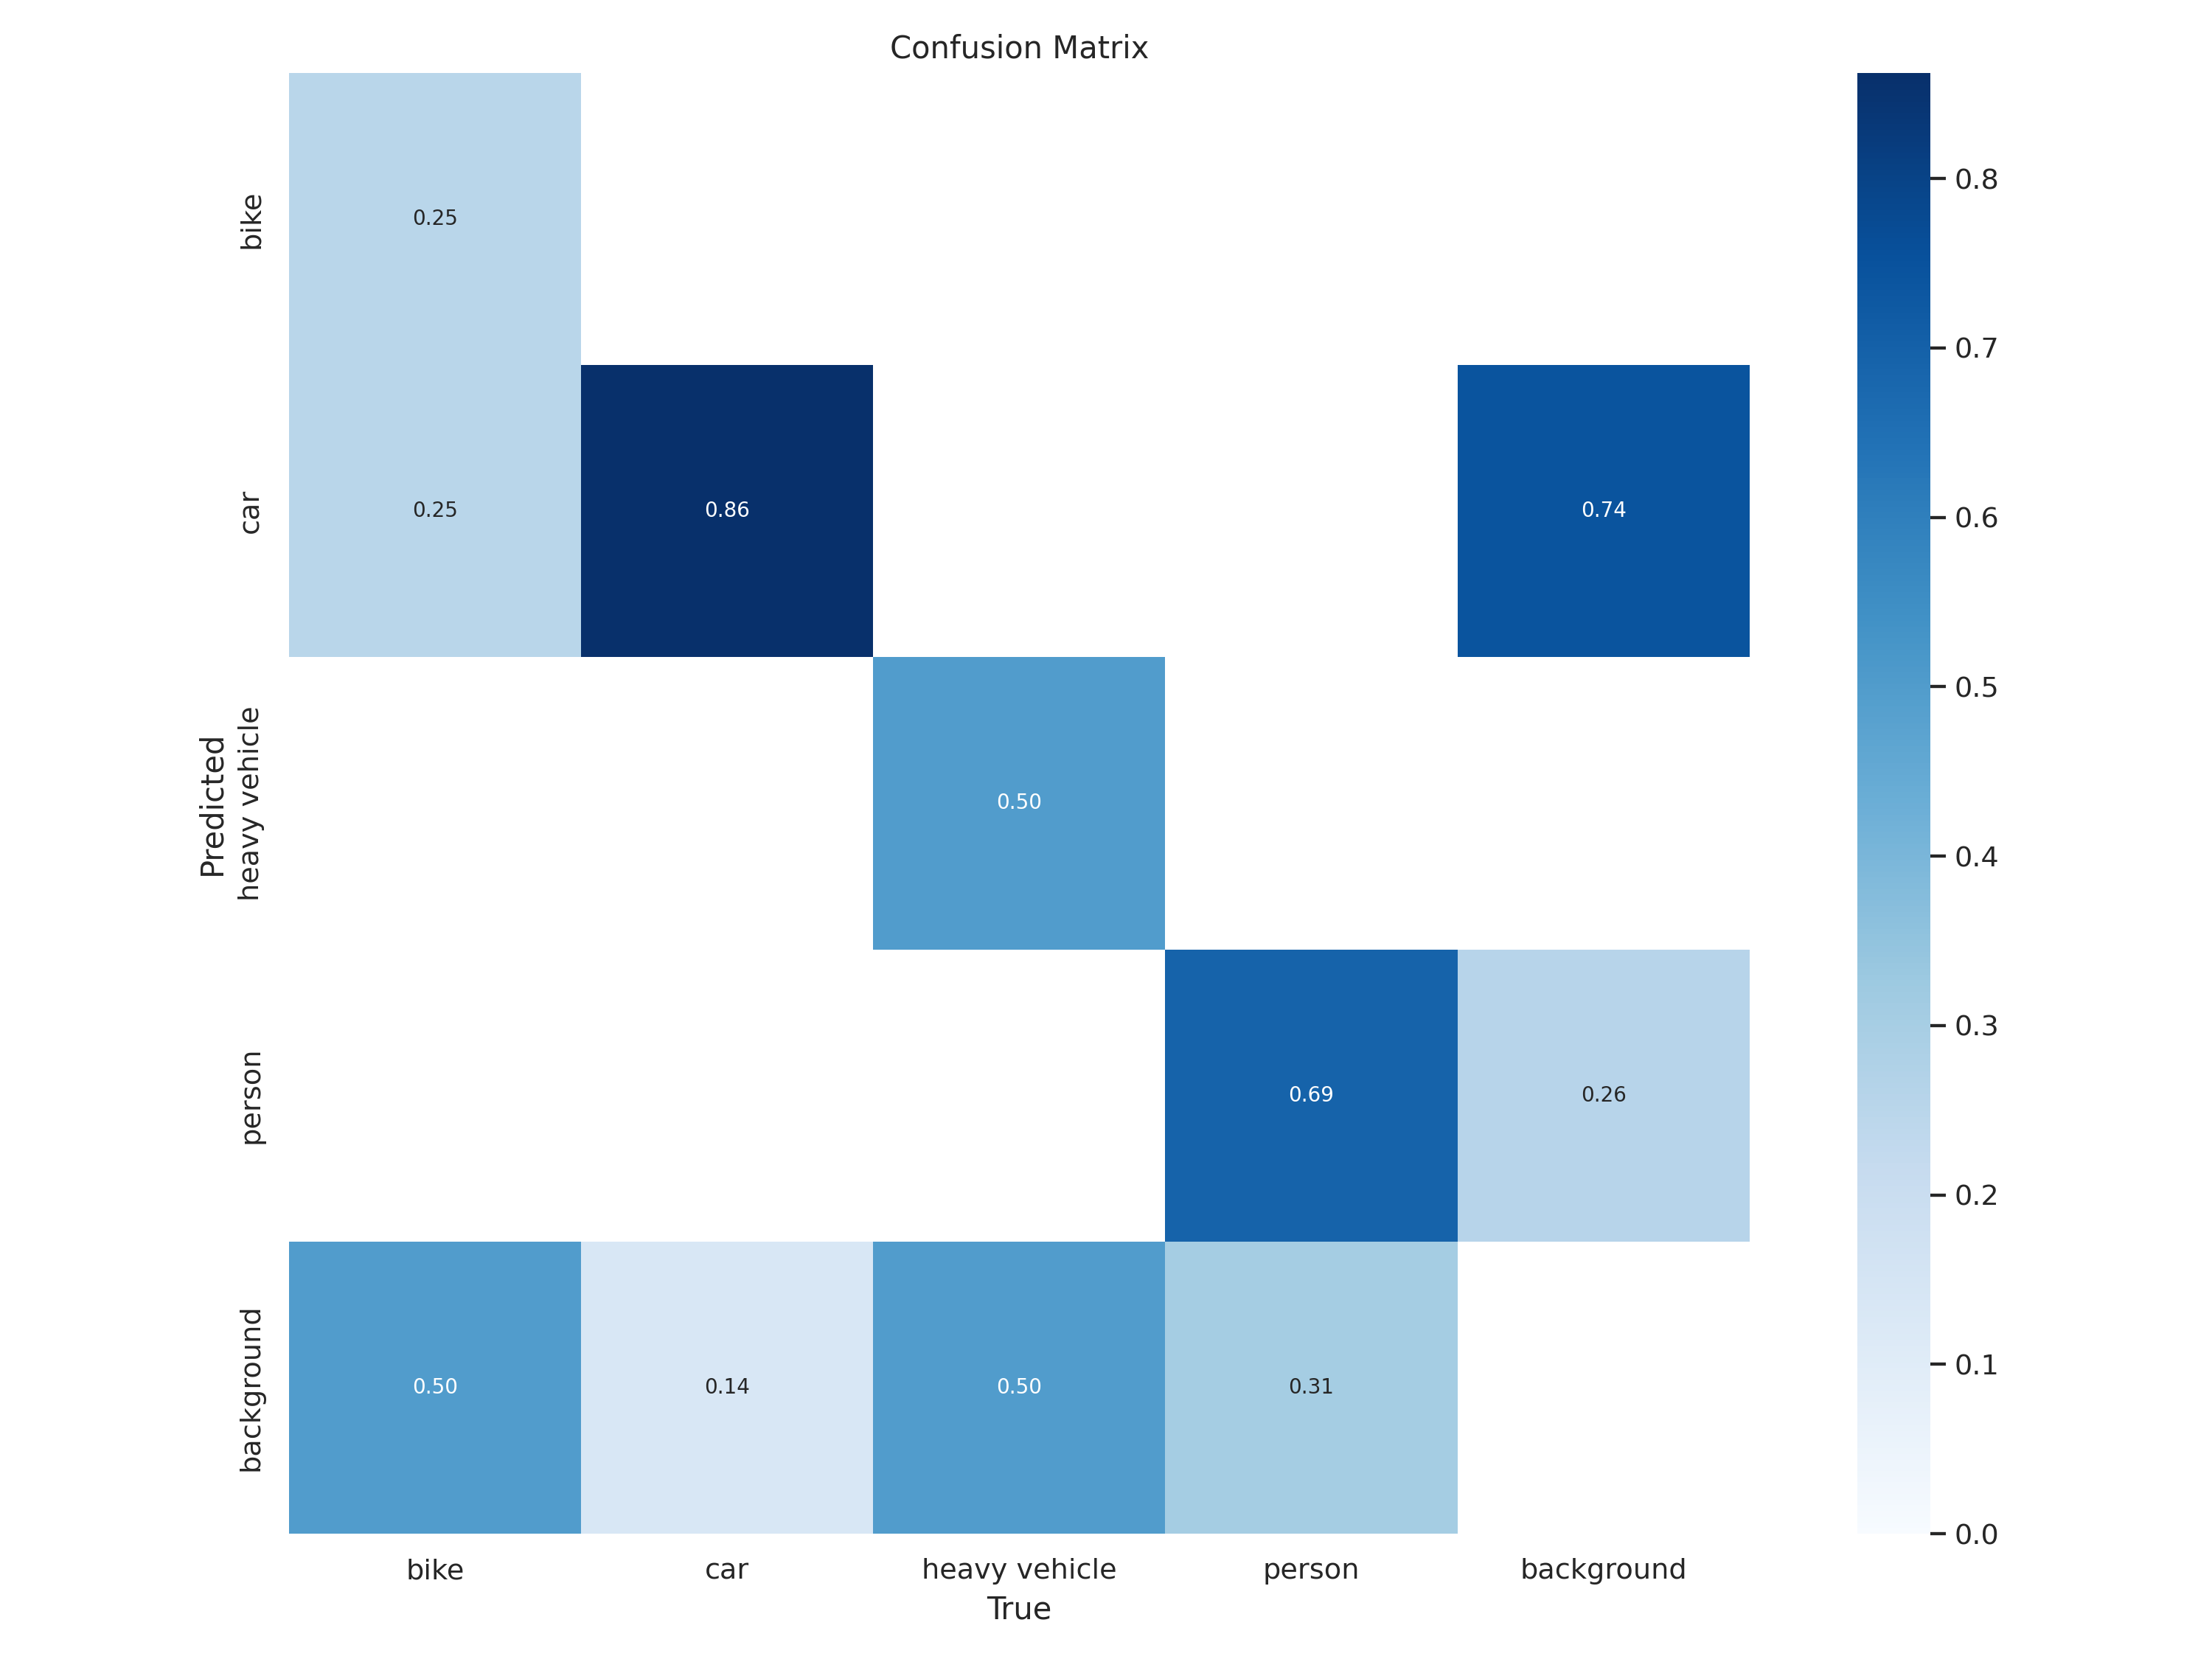

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


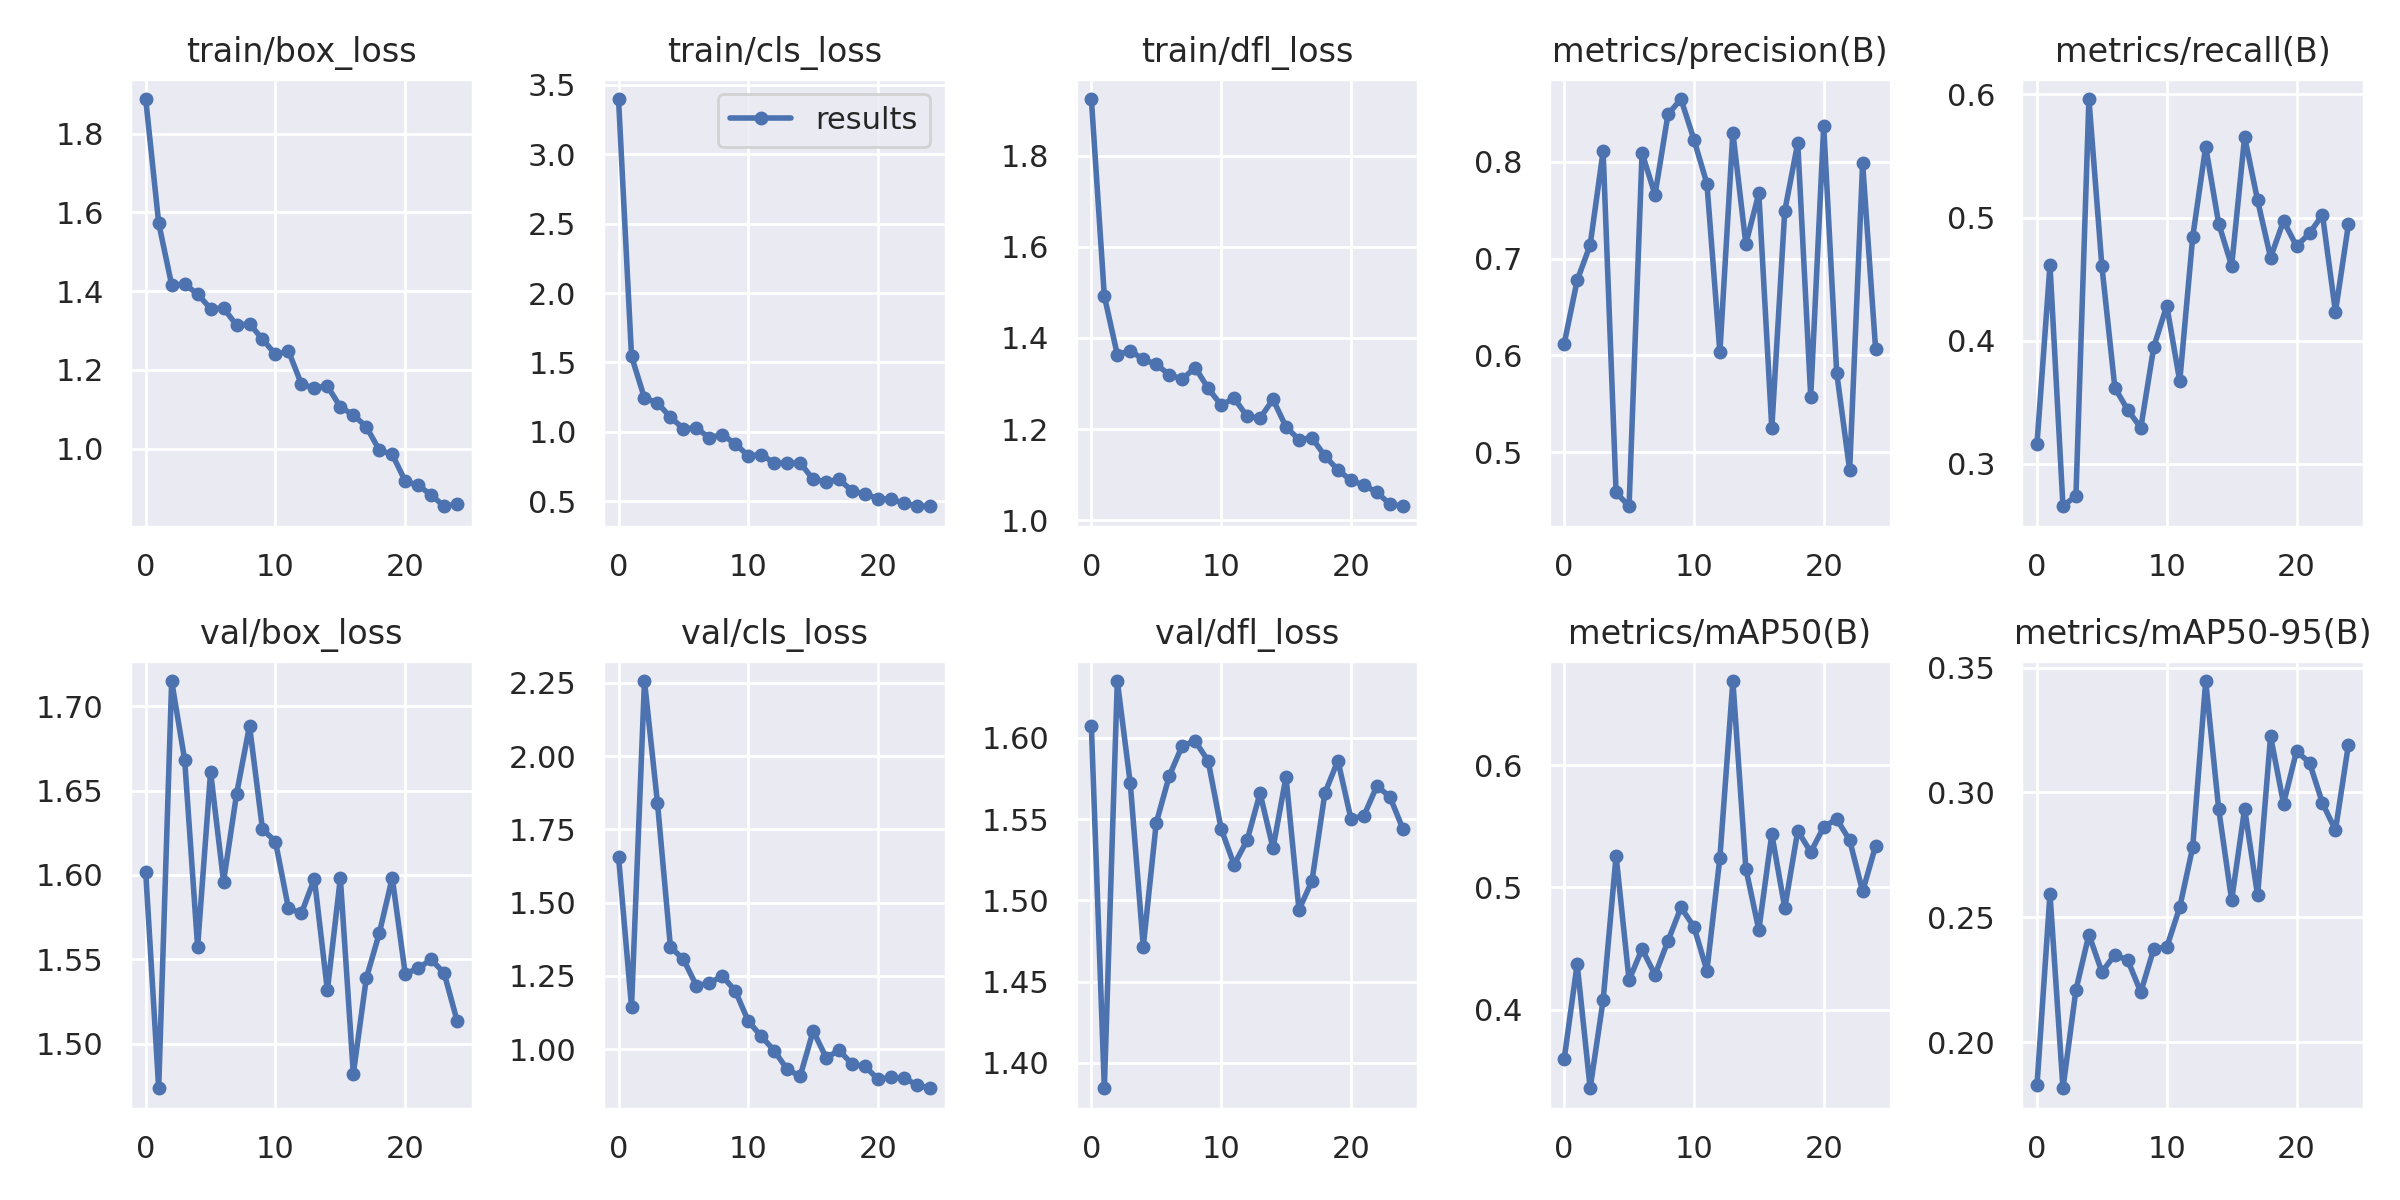

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


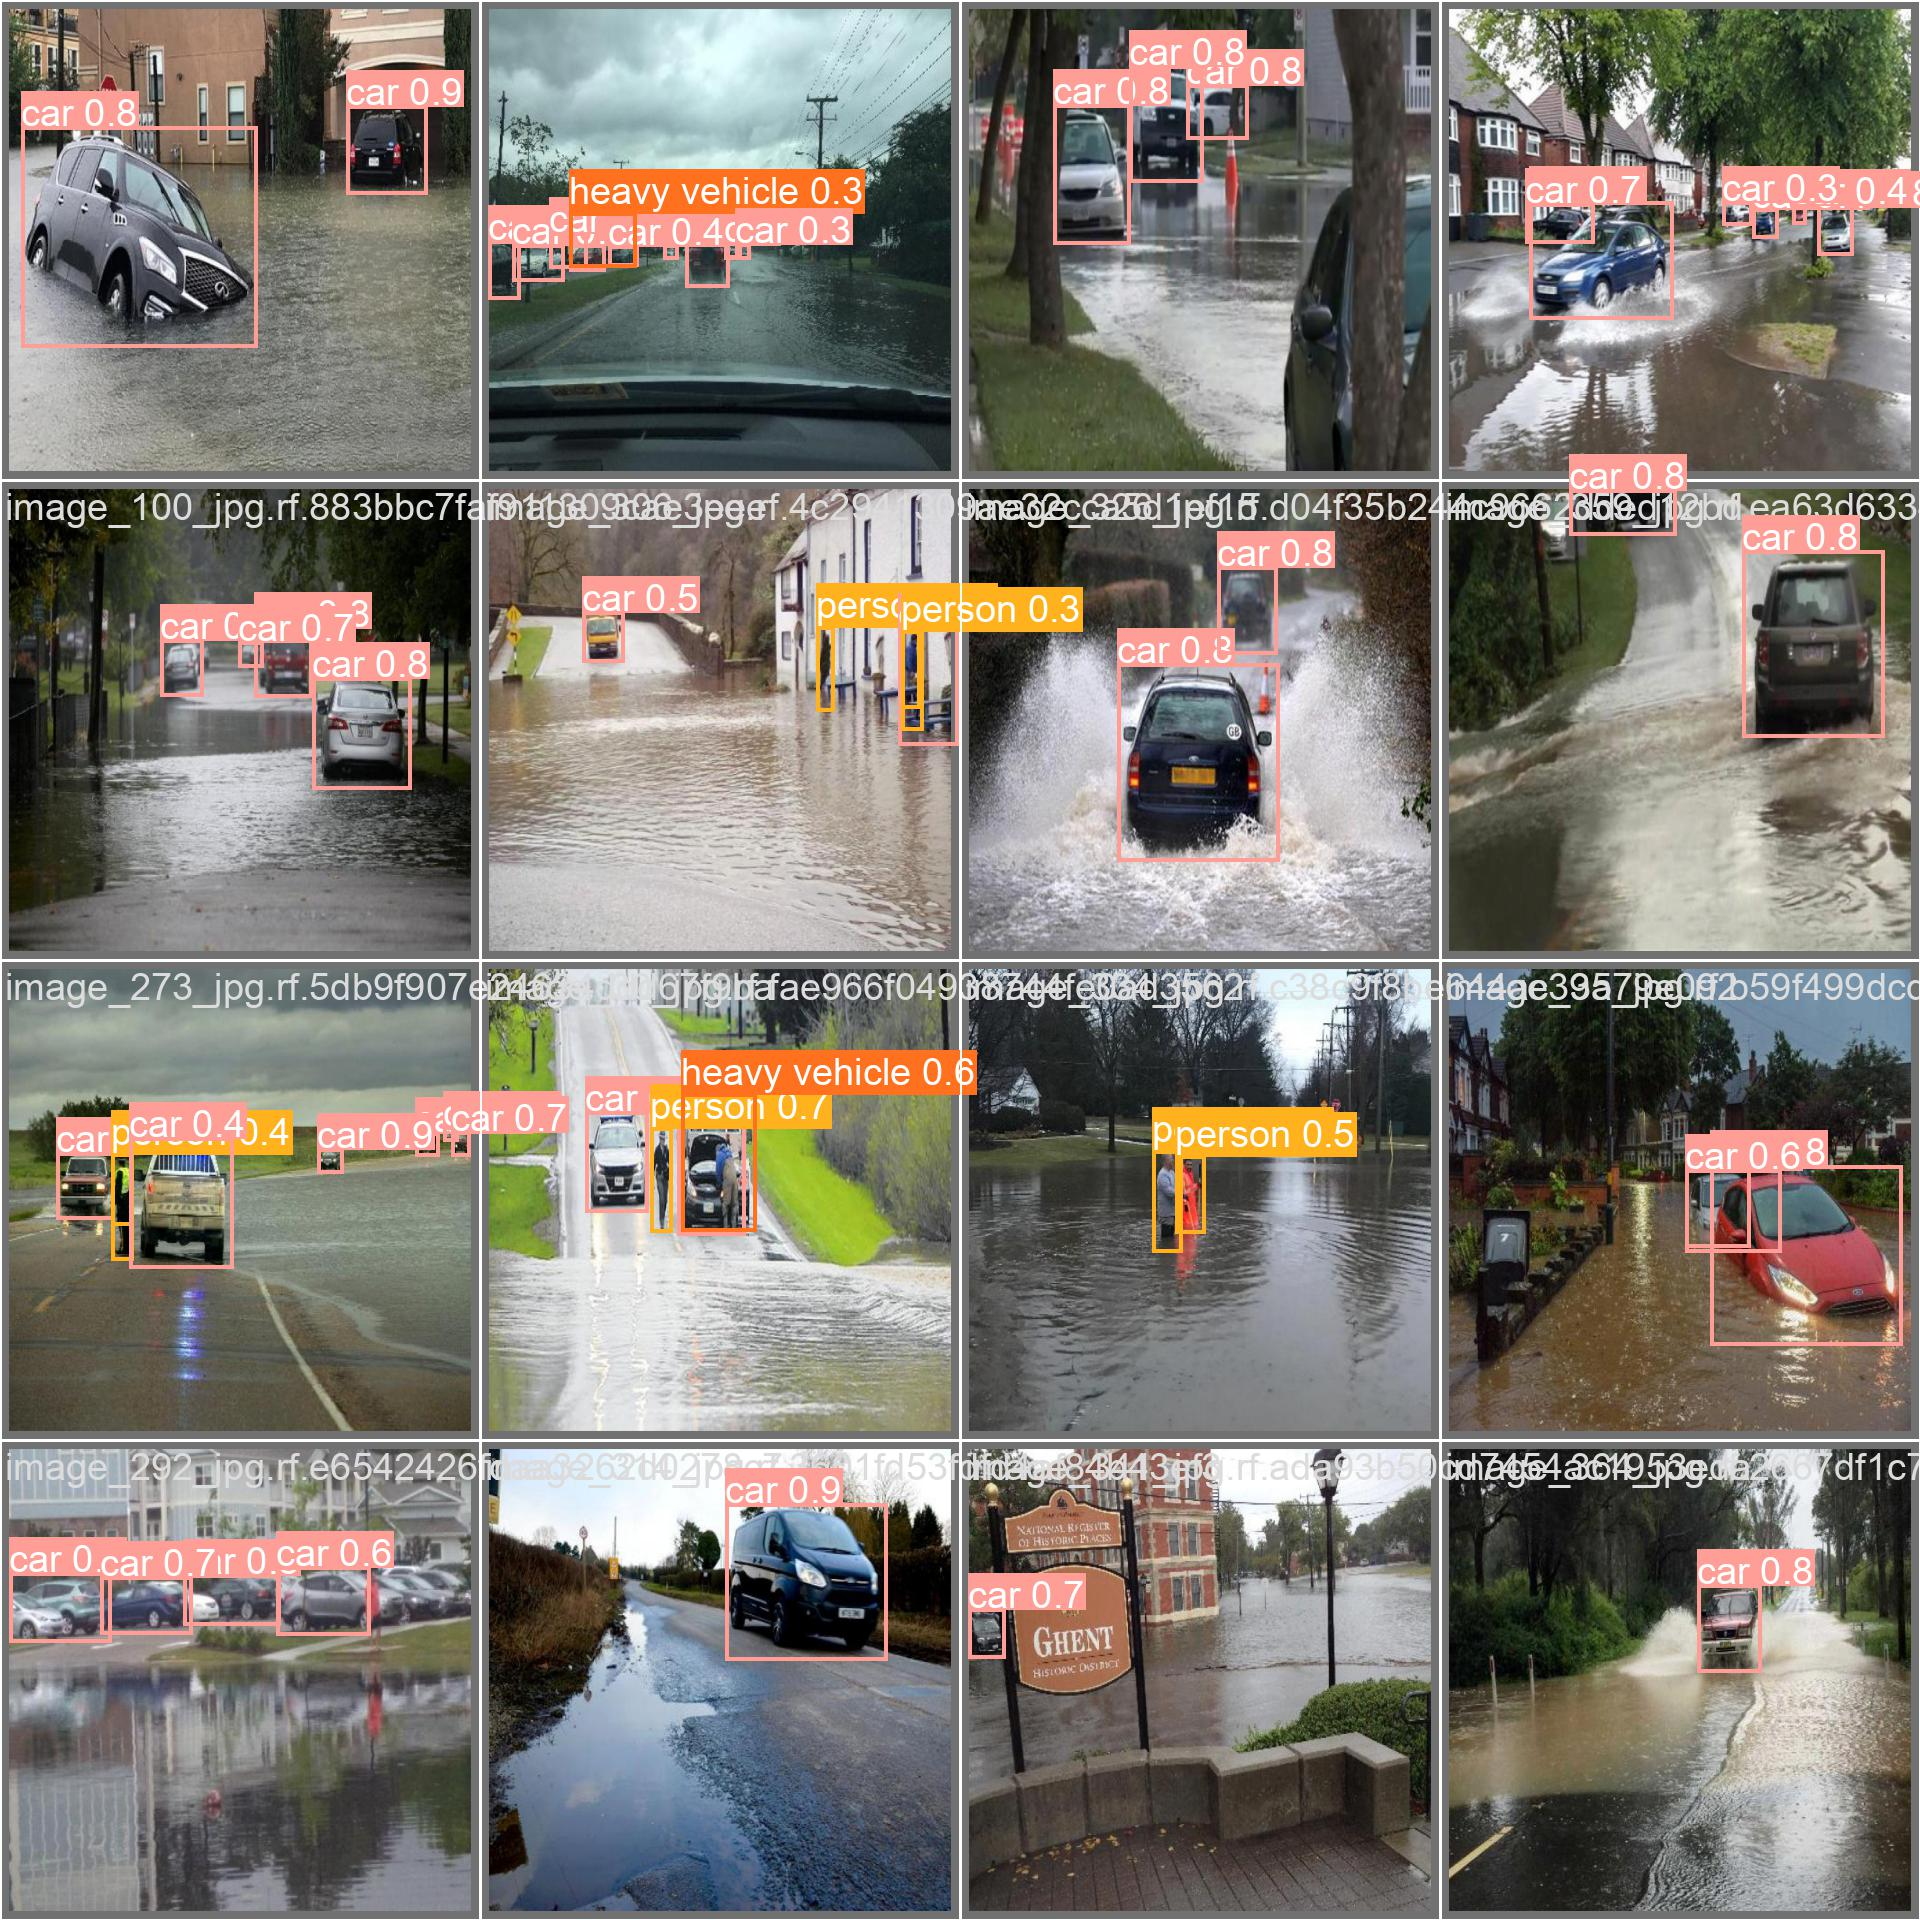

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-20 02:01:49.675734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Object-detection-in-post-flood-scenarios-2-1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100% 62/62 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.73s/it]
                   all         62        195       0.83      0.558       0.67      0.336
                  bike         62          4      0.697       0.25      0.476      0.116
                   car         62        138       0.82      0.819      0.864      0.492
         heavy vehicle         62          4          1      0.498      0.571       0.34
                person         62         49      0.803

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-06-20 02:02:12.273024: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/35 /content/datasets/Object-detection-in-post-flood-scenarios-2-1/test/images/image_116_jpg.rf.37200e0f1396728faff7e1b70f875699.jpg: 800x800 1 person, 24.6ms
image 2/35 /content/datasets/Object-detection-in-post-flood-scenarios-2-1/test/images/image_11_jpg.rf.09ceb678834aa90977c3d330a4e0d5a7.jpg: 800x800 1 person, 24.7ms
image 3/35 /content/datasets/Object-detection-in-post-flood-scenarios-2-1/test/images/image_131_jpg.rf.44d3f51ec4035c148a356d986f52b39a.jpg: 800x800 1 car, 24.6ms
image 4/35 /content/datasets/Object-detection-in-post-flood-scenarios-2-1/test/images/image_152_jpg.rf.62420e4960ac687d34071bd7d29b81a9.jpg: 800x800 2 cars, 24.6ms
image 5/35 /content/datasets/Object-detec

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")